# 3D Time-Dependent Schrödinger PINN

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import torch

# import the class MLP which is inherited from torch.nn.module. 
# this function is defined in another file.
from MLP_module_Schrodinger_1D import train_model, MLP, exact_solution_example

In [2]:
# Define the basis for the variables. 
x_train = torch.linspace(0, 1, 1000).reshape(-1, 1)
t_train = torch.ones_like(x_train) * 0.0


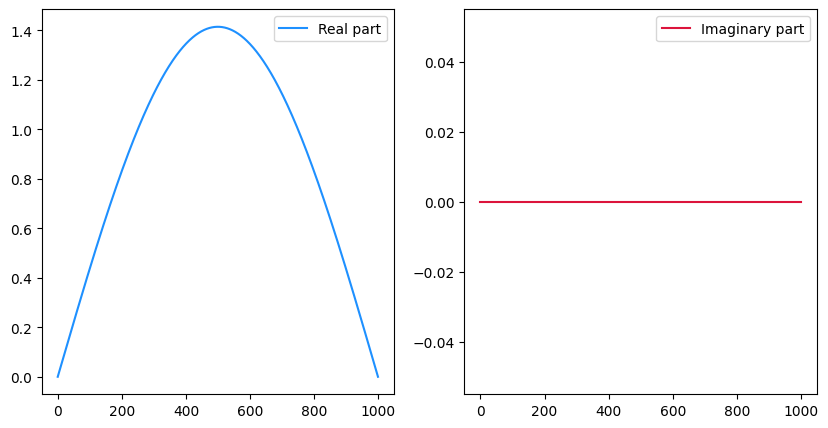

In [6]:
u0, v0 = exact_solution_example(x_train, 0.0, plot=True)

In [8]:
# Create the set of parameters
# The input vector mut be of size 4 dimensions x, y, z and t
# The output vector must be of size 2 dimensions, which are
# The real and imaginary parts of the wave function

# Set the hyperparameters
hparams = {
    'input_dim': 4, 
    'out_dim': 2, 
    'width': 32,
    'depth': 42,
    'activation': 'sigmoid', # The activation function
    'initialization': 'uniform', # The initialization of the weights
}

# Set the initial conditions
initial_conditions = {
    "mass": 1,
    "hbar": 1,
    "L": 1,
    "V": 0, # The potential is zero
    "N": 100, # The number of points in the domain
    "lambda_ic": 120, # The weight of the initial condition in the minimization
    "psi_0t": 0,
    "psi_Lt": 0,
}
# Set the parameters for the PDE
boundary_conditions = {
    "lambda_bc": 1, # The weight of the boundary in the minimization
    "u0": u0, # The initial condition for the real part
    "v0": v0, # The initial condition for the imaginary part
}

# Set the parameters for the training
params_set = {
    "L": initial_conditions["L"],
    "Number_of_points": initial_conditions["N"],
    "BCs": boundary_conditions,
    "ICs": initial_conditions,
    "eta": 0.01, # The learning rate
    "l2_lambda": 1e-6, # The weight of the L2 regularization
    "num_epochs": 900 # The number of epochs
}

# Create the model as in the description
# The model is a MLP with 4 input dimensions and 2 output dimensions
# width = 18, depth = 6, activation = 'tanh', initialization = 'normal'
model_schr = MLP(hparams)

TypeError: empty(): argument 'size' failed to unpack the object at pos 2 with error "type must be tuple of ints,but got dict"

In [ ]:
# Train the model
train_model(
    model_schr, 
    params_set, 
    initial_conditions, 
    boundary_conditions
)

NameError: name 'model' is not defined

In [ ]:
# ── L-BFGS Training ──────────────────────────────────────────
""" ICs = {'mass':params['mass'],'hbar':params['hbar'],'L':params['L'],'lambda_ic':params['lambda_ic']}
BCs = {'lambda_bc':params['lambda_bc']}
optimizer = torch.optim.LBFGS(
    model.parameters(),
    lr=1,
    max_iter=5000,
    tolerance_grad=1e-8,
    tolerance_change=1e-8,
)

# storage for losses (if you want to plot later)
loss_hist, pde_hist, bc_hist, ic_hist = [], [], [], []

def closure():
    optimizer.zero_grad()
    t_b = torch.rand((params['Nf'],1)) * params['T_max']
    loss, pde_l, bc_l, ic_l = loss_fun(
        t_b, model, BCs, ICs,
        Nf=params['Nf'], Nb=params['Nb']
    )
    loss.backward()
    # record
    loss_hist.append(loss.item())
    pde_hist.append(pde_l.item())
    bc_hist.append(bc_l.item())
    ic_hist.append(ic_l.item())
    return loss

# run the L-BFGS optimizer
optimizer.step(closure)

# optionally plot loss curves
import matplotlib.pyplot as plt
plt.semilogy(loss_hist,  label='Total')
plt.semilogy(pde_hist,   label='PDE')
plt.semilogy(bc_hist,    label='BC')
plt.semilogy(ic_hist,    label='IC')
plt.legend(); plt.title("L-BFGS Loss Curves"); plt.show() """


' ICs = {\'mass\':params[\'mass\'],\'hbar\':params[\'hbar\'],\'L\':params[\'L\'],\'lambda_ic\':params[\'lambda_ic\']}\nBCs = {\'lambda_bc\':params[\'lambda_bc\']}\noptimizer = torch.optim.LBFGS(\n    model.parameters(),\n    lr=1,\n    max_iter=5000,\n    tolerance_grad=1e-8,\n    tolerance_change=1e-8,\n)\n\n# storage for losses (if you want to plot later)\nloss_hist, pde_hist, bc_hist, ic_hist = [], [], [], []\n\ndef closure():\n    optimizer.zero_grad()\n    t_b = torch.rand((params[\'Nf\'],1)) * params[\'T_max\']\n    loss, pde_l, bc_l, ic_l = loss_fun(\n        t_b, model, BCs, ICs,\n        Nf=params[\'Nf\'], Nb=params[\'Nb\']\n    )\n    loss.backward()\n    # record\n    loss_hist.append(loss.item())\n    pde_hist.append(pde_l.item())\n    bc_hist.append(bc_l.item())\n    ic_hist.append(ic_l.item())\n    return loss\n\n# run the L-BFGS optimizer\noptimizer.step(closure)\n\n# optionally plot loss curves\nimport matplotlib.pyplot as plt\nplt.semilogy(loss_hist,  label=\'Total\')\

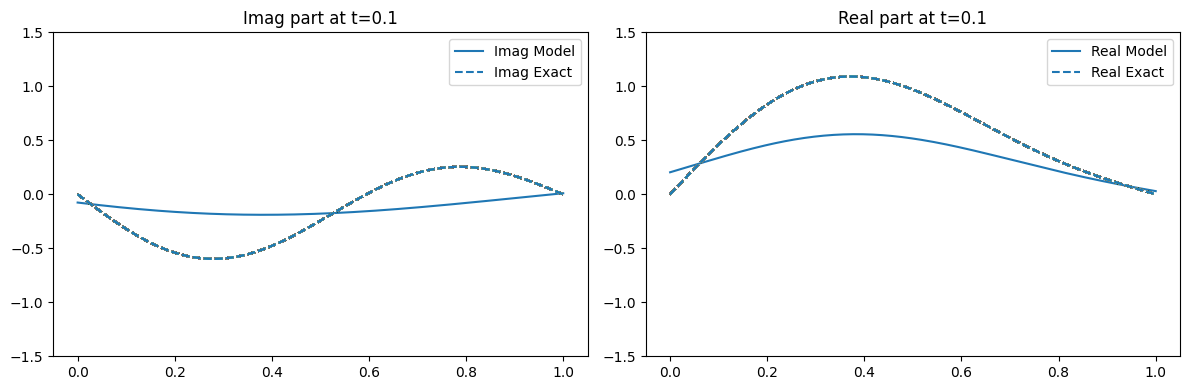

In [ ]:
# Comparison at t=0.1
plt.close('all')
fig, axs = plt.subplots(1,2,figsize=(12,4))
L = params_set['L']
x = torch.linspace(0, L, 200).reshape(-1,1)
y = torch.ones_like(x)*(L/2)
z = torch.ones_like(x)*(L/2)
t = torch.ones_like(x)*0.05
pts = torch.cat([x,y,z,t], dim=1)
uv = model_schr(pts)
u_pred = uv[:,0].detach()
v_pred = uv[:,1].detach()
u_exact, v_exact = exact_solution_example(pts, t.flatten())
# Plot Imaginary
axs[0].plot(x.numpy(), v_pred.numpy(), label='Imag Model')
axs[0].plot(x.numpy(), v_exact.numpy(), '--', label='Imag Exact')
axs[0].set_title('Imag part at t=0.1')
axs[0].set_ylim([-1.5, 1.5])
# Plot Real
axs[1].plot(x.numpy(), u_pred.numpy(), label='Real Model')
axs[1].plot(x.numpy(), u_exact.numpy(), '--', label='Real Exact')
axs[1].set_title('Real part at t=0.1')
axs[1].set_ylim([-1.5, 1.5])
# Deduplicate legend
for ax in axs:
    h, l = ax.get_legend_handles_labels()
    uniq = dict(zip(l, h))
    ax.legend(uniq.values(), uniq.keys(), loc='best')
plt.tight_layout()
plt.show()